In [1]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image

In [129]:
from skimage import filters
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte, img_as_uint

In [3]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

In [4]:
# reminder: image is downscaled by 3, we need to downscale the label coordinates as well
scale = 3

### Select Dataset

In [5]:
DATASET_NUMBER = 1

In [6]:
# location of silicon wafer 1 data
dir_silicon_wafer = f"../dataset/silicon_wafer_{str(DATASET_NUMBER)}"

In [7]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), ('point_4', 'x'), ('point_4', 'y')])

### Drawing

In [8]:
def rgb(hex_color):
    return tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))

In [9]:
def draw_labels(image, labels_df, thickness, color, fill_poly):
    for row in range(labels_df.shape[0]):
        pts = np.array(labels_df.loc[row]).reshape((-1,1,2))
        if fill_poly:
            image = cv.fillPoly(image, np.int32([pts]), color=rgb(color))
        else:
            image = cv.polylines(image, np.int32([pts]), True, color=rgb(color), thickness=thickness)
    
    return image

In [10]:
thickness = 5
magnet_color = "#00cccc"
tissue_color = "#ff6666"

fill_poly = False

In [11]:
legend_elements = [Line2D([0], [0], color=magnet_color, lw=thickness, label='Magnet Part'),
                       Line2D([0], [0], color=tissue_color, lw=thickness, label='Brain Part')]

### Load Segmentation Boxes (Mag + Tissues)

In [12]:
wafer_tissue_lbl = pd.read_csv(f"{dir_silicon_wafer}/source_sections_tissue.txt", sep="\t|,", header=None, names=index, engine='python')//3

In [13]:
wafer_mag_lbl = pd.read_csv(f"{dir_silicon_wafer}/source_sections_mag.txt", sep="\t|,", header=None, names=index, engine='python')//3

In [14]:
path_img= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3.tif"
if os.path.isfile(path_img):
    wafer_1 = cv.imread(path_img, 0)
else:
    print ("The file " + path_img + " does not exist.")

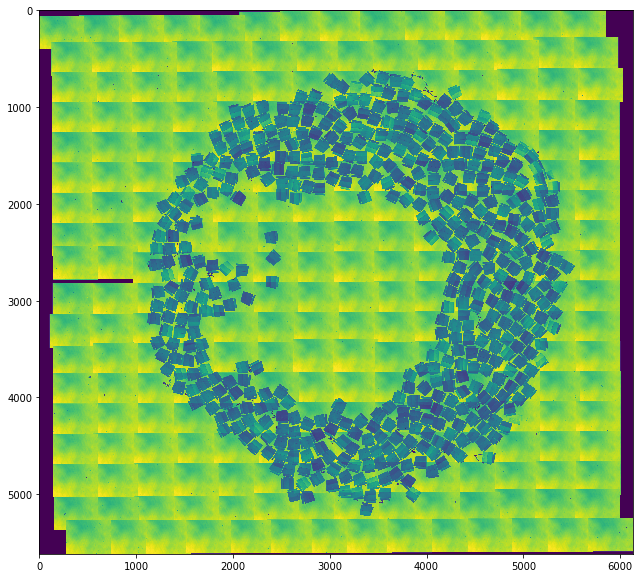

In [15]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_1)

In [16]:
wafer_1.shape

(5616, 6136)

In [17]:
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

In [18]:
wafer_1_magfluo = cv.resize(wafer_1_magfluo, (wafer_1.shape[1], wafer_1.shape[0])) 

In [19]:
wafer_1_magfluo.shape

(5616, 6136)

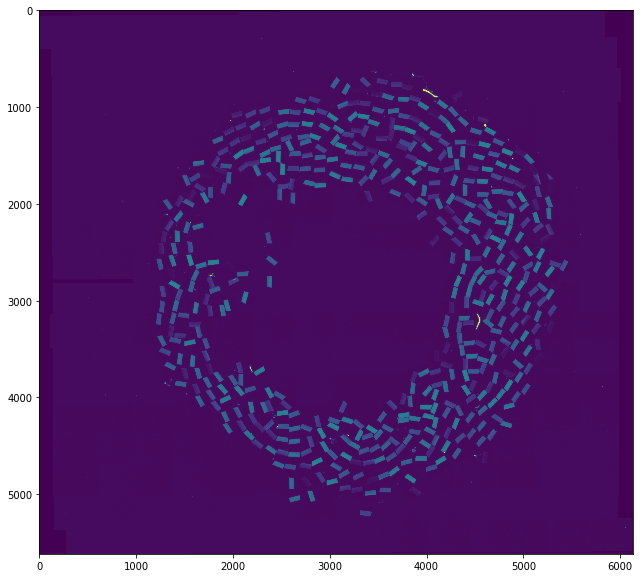

In [20]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_1_magfluo)

In [23]:
radius = 15
selem = disk(radius)

local_otsu = rank.otsu(image=wafer_1_magfluo, selem=selem)
mask = wafer_1_magfluo >= local_otsu

KeyboardInterrupt: 

In [ ]:
block_size = 35
binary_adaptive = threshold_adaptive(image, block_size, offset=10)

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_1_magfluo)

In [ ]:
cv.imwrite("data"+str(DATASET_NUMBER)+"_test_magfluo.tiff", wafer_1_magfluo)

In [ ]:
wafer_1_magfluo.shape

In [ ]:
def check_magfluo(pixel):
    if(pixel < 15):
        return False
    else:
        return True

In [ ]:
height_fluo = wafer_1_magfluo.shape[0]
width_fluo = wafer_1_magfluo.shape[1]

for i in range(height_fluo):
    for j in range(width_fluo):
        if( (wafer_1_magfluo[i,j] > 10) and (wafer_1_magfluo[i,j] < 200) ):
            wafer_1[i,j] = 255


In [ ]:
plt.figure(figsize=(30, 40))
plt.imshow(wafer_1)

In [ ]:
cv.imwrite("data"+str(DATASET_NUMBER)+"_filtered_magfluo.tiff", wafer_1)

### Just compare magnet labels on fluorescent images

In [38]:
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

In [39]:
wafer_1_magfluo = draw_labels(wafer_1_magfluo, wafer_mag_lbl, thickness=2, color=magnet_color, fill_poly=False)

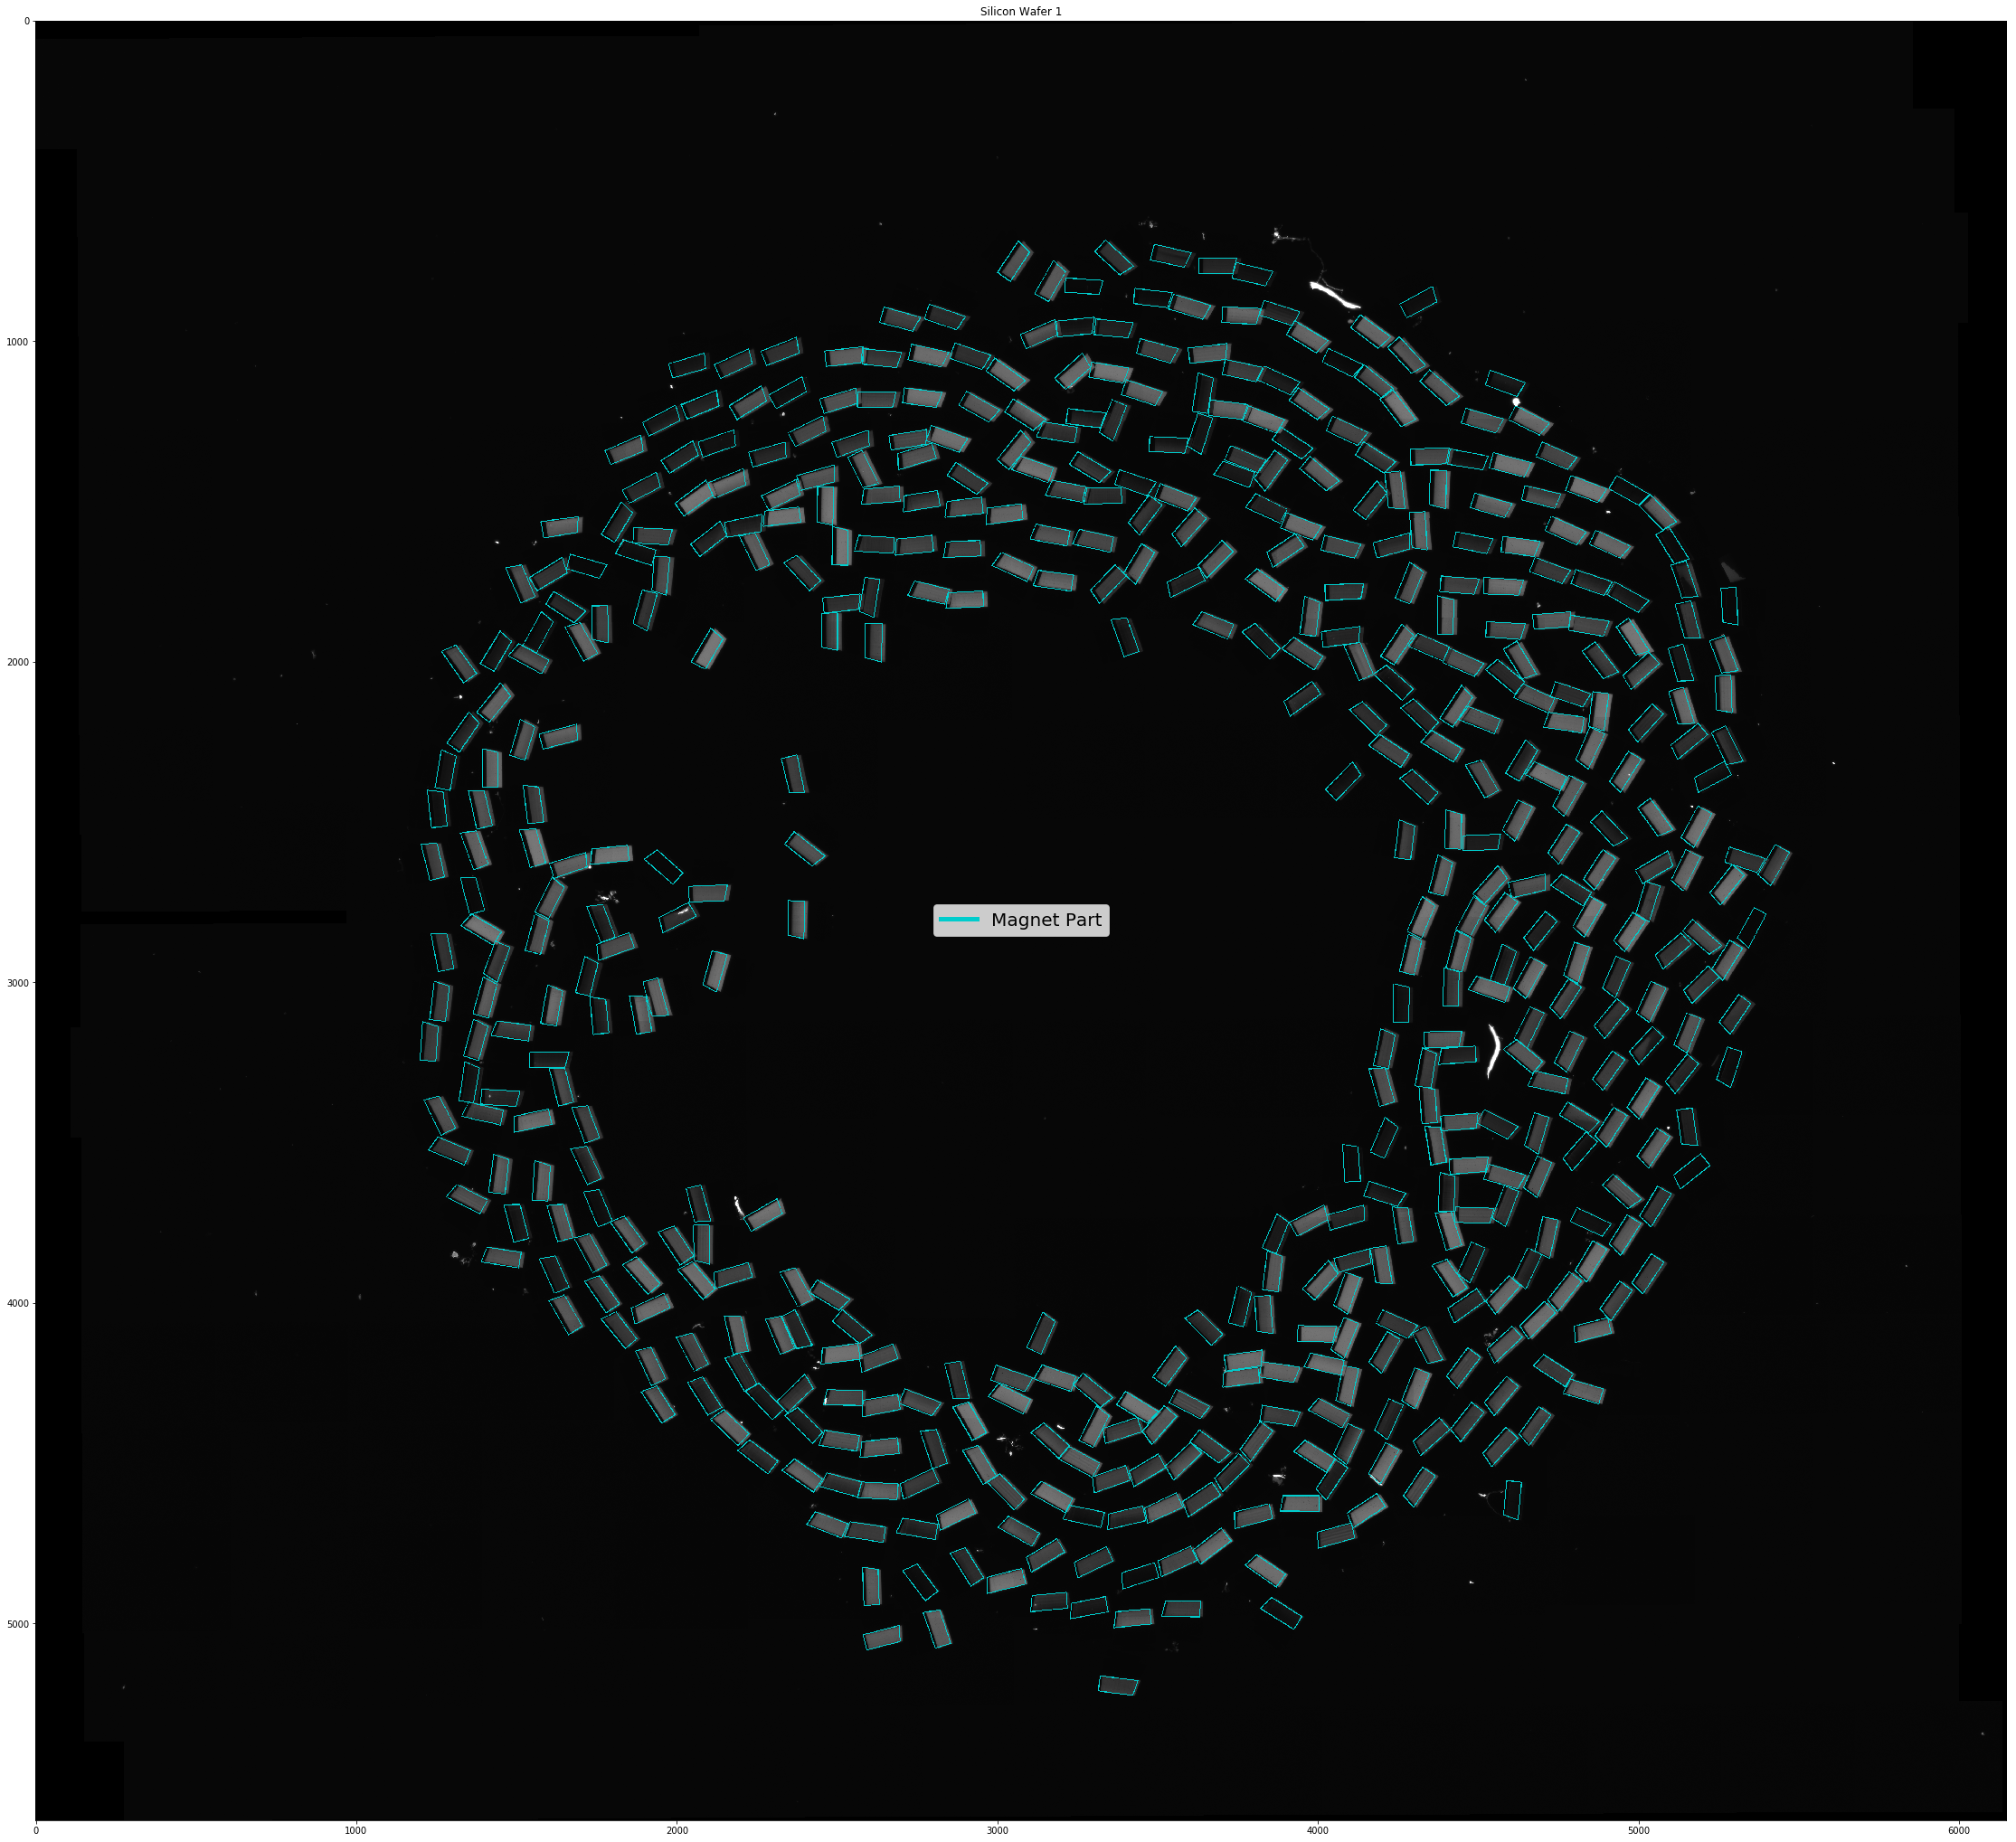

In [40]:
plt.figure(figsize=(40, 36.61))
plt.imshow(wafer_1_magfluo)

plt.title('Silicon Wafer 1')

legend_elements = [Line2D([0], [0], color=magnet_color, lw=thickness, label='Magnet Part')]
plt.legend(handles=legend_elements, loc='center', fontsize=20)

plt.show()

Labels themselves seems to be a bit shiffted to left and not covering fluorescent magnetic parts nicely.

In [92]:
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

In [93]:
translate_by = -10
M = np.float32([[1,0,translate_by],[0,1,0]])
wafer_1_magfluo = cv.warpAffine(wafer_1_magfluo,M,wafer_1_magfluo.shape[:2][::-1])

In [94]:
wafer_1_magfluo = draw_labels(wafer_1_magfluo, wafer_mag_lbl, thickness=2, color=magnet_color, fill_poly=False)

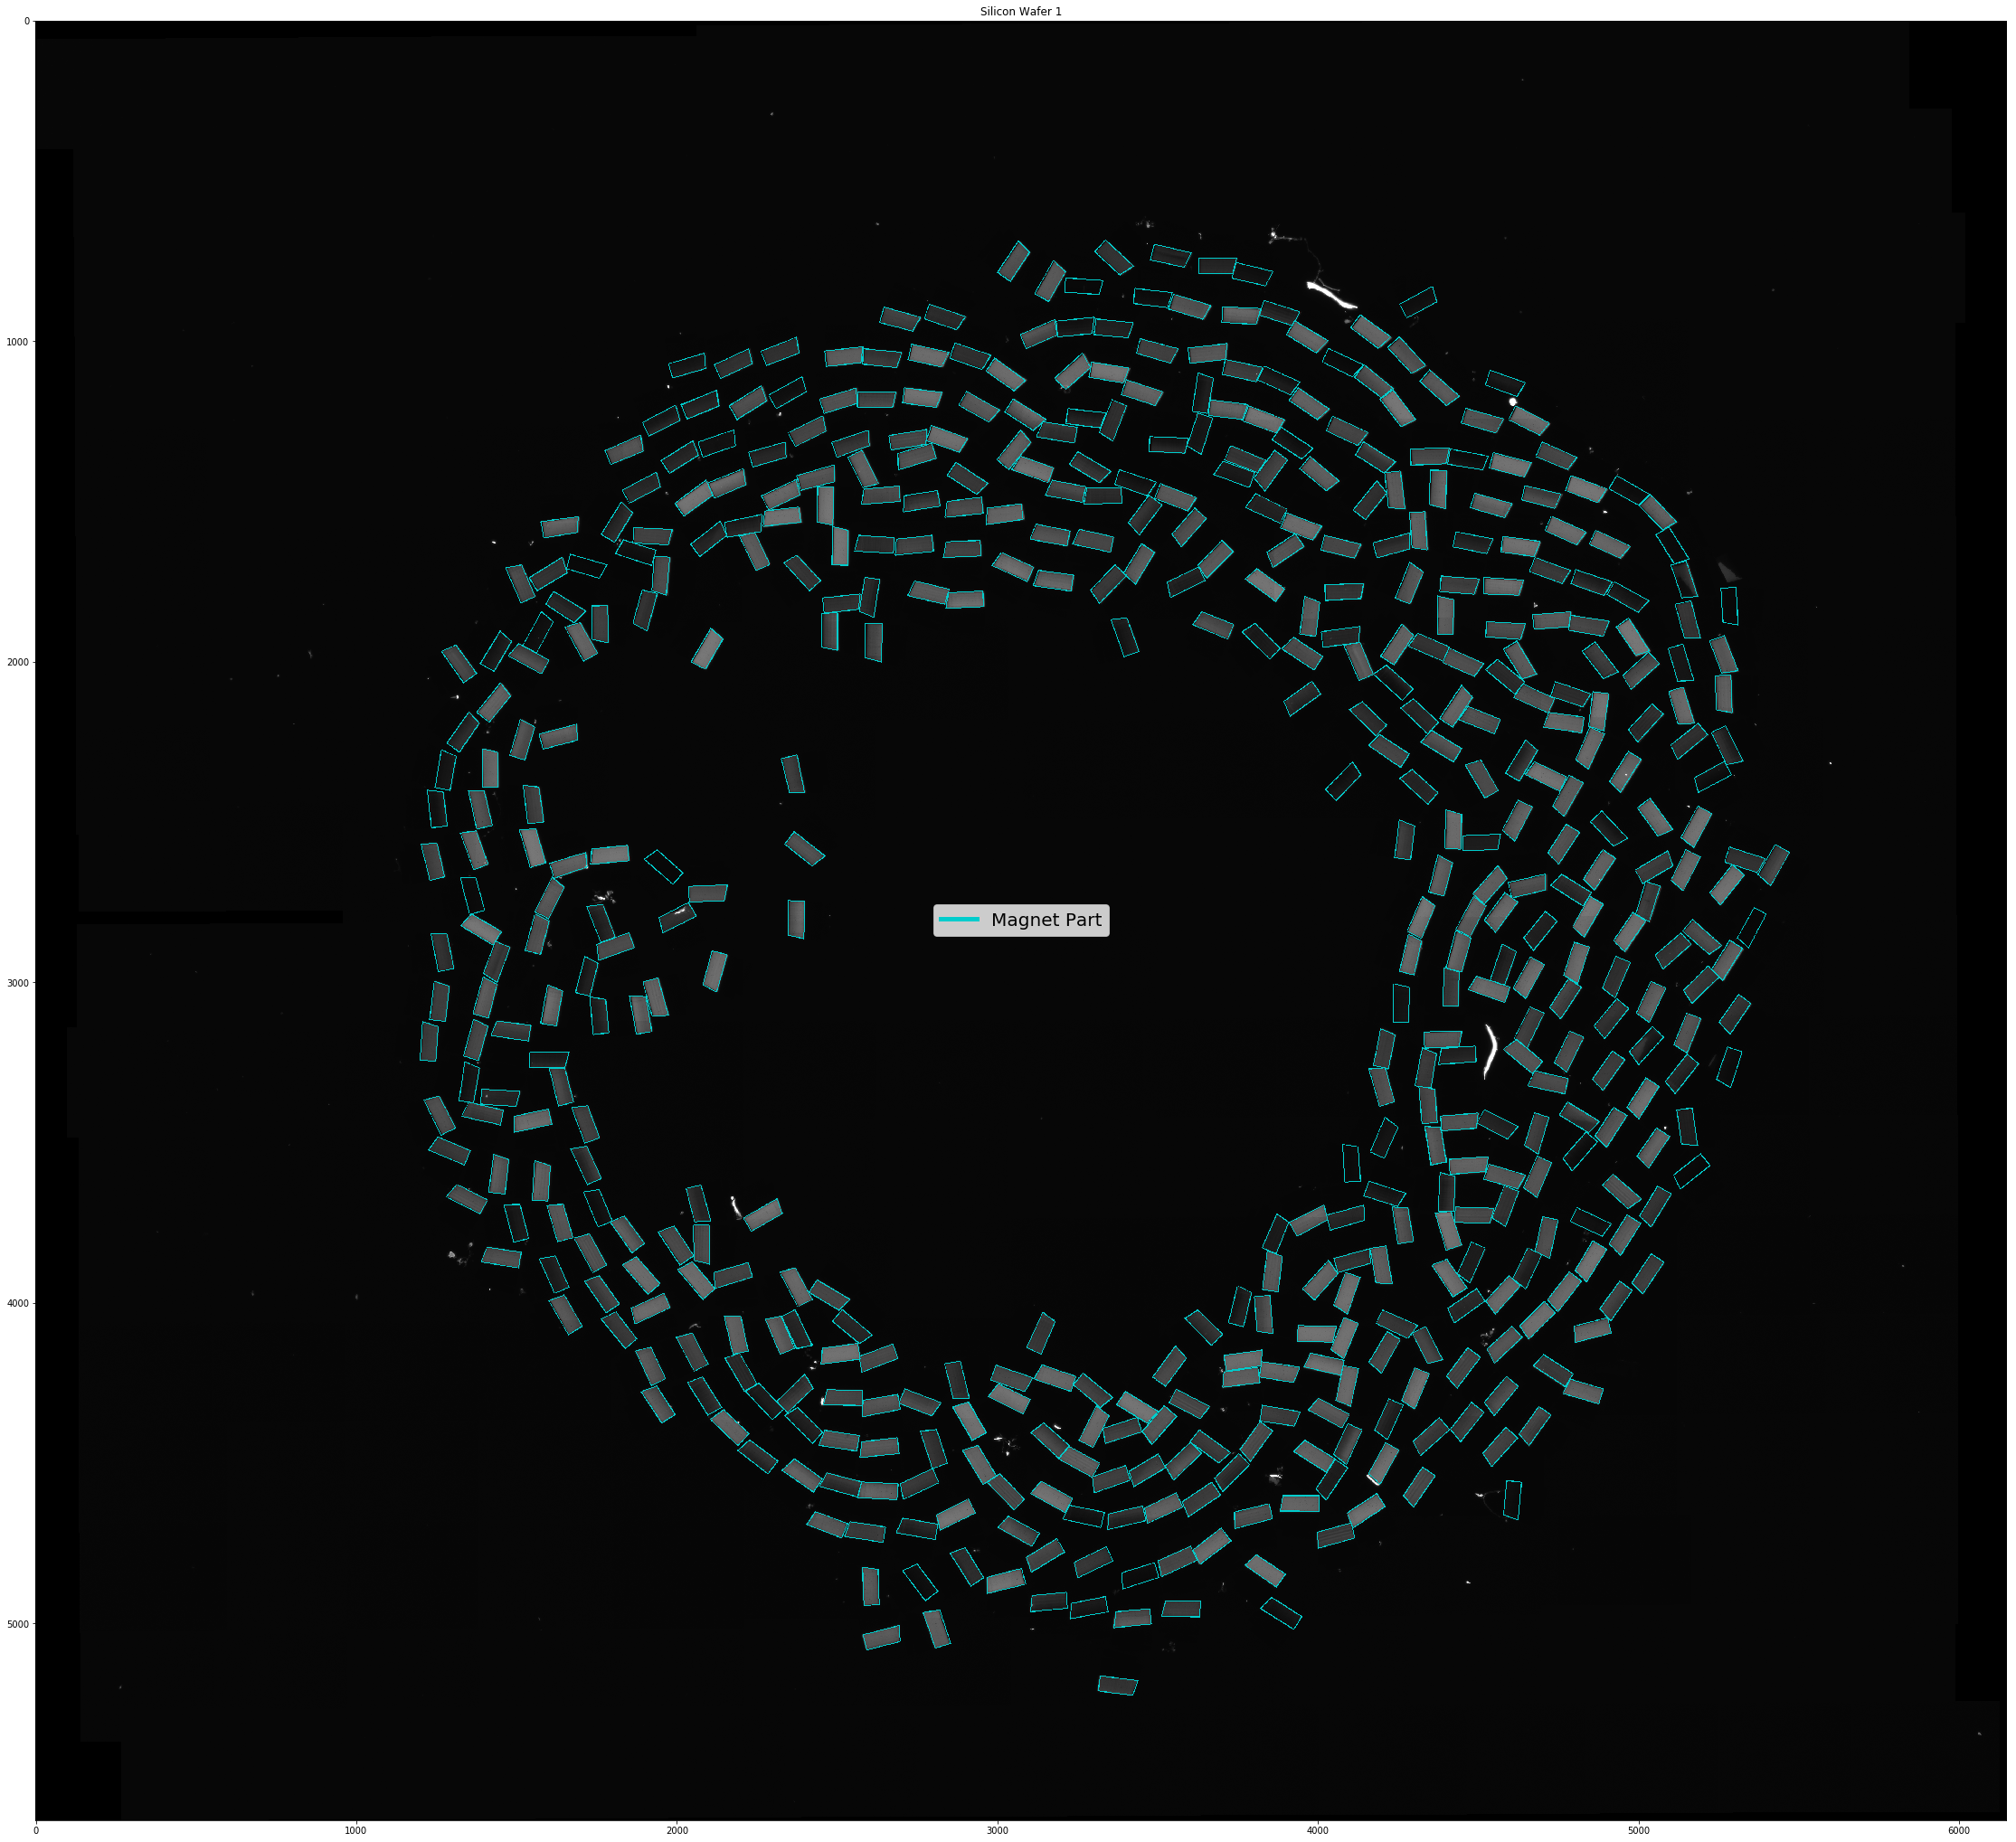

In [95]:
plt.figure(figsize=(40, 36.61))
plt.imshow(wafer_1_magfluo)

plt.title('Silicon Wafer 1')

legend_elements = [Line2D([0], [0], color=magnet_color, lw=thickness, label='Magnet Part')]
plt.legend(handles=legend_elements, loc='center', fontsize=20)

plt.show()

### Tresholding Local and Global

In [100]:
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

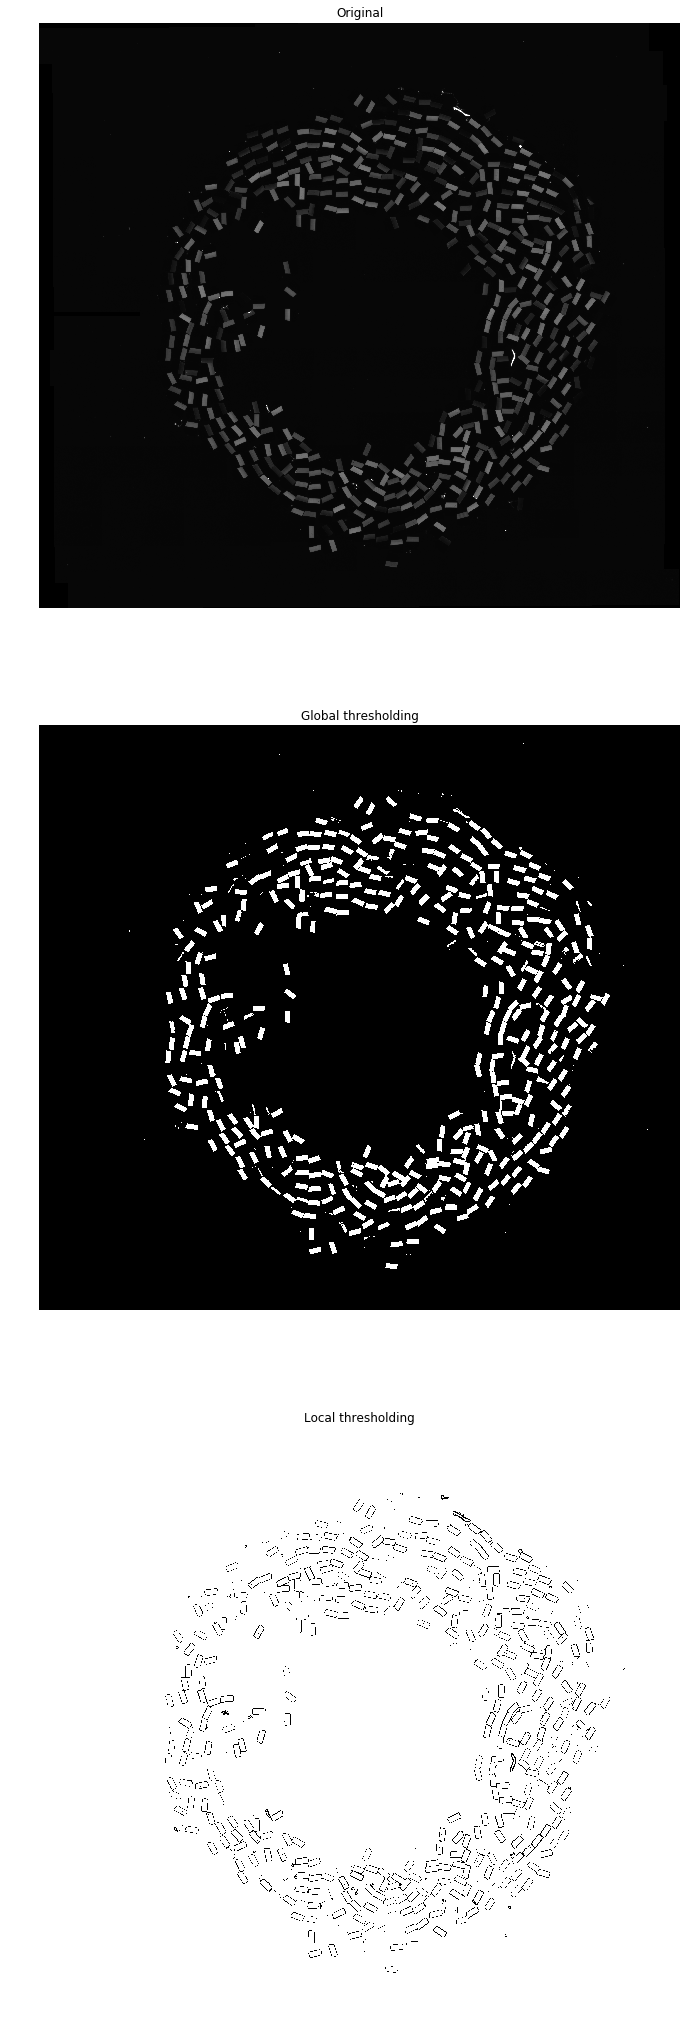

In [101]:
from skimage.filters import threshold_otsu, threshold_local


image = wafer_1_magfluo

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(40, 36.61))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

#### Using Local Tresholding with labels

In [201]:
from matplotlib import pyplot as plt
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

In [202]:
from skimage.filters import threshold_otsu, threshold_local

# play with following 2 values
block_size = 35   # was 35
offset = 5   # was 10
local_thresh = threshold_local(wafer_1_magfluo, block_size, offset=offset)
wafer_1_magfluo = image > local_thresh

wafer_1_magfluo = img_as_uint(wafer_1_magfluo, force_copy=False)

cv.imwrite("test_local_treshold.tiff", wafer_1_magfluo)

True

In [203]:

path_img_magfluo= f"test_local_treshold.tiff"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

In [204]:
translate_by = -10
M = np.float32([[1,0,translate_by],[0,1,0]])
wafer_1_magfluo = cv.warpAffine(wafer_1_magfluo,M,wafer_1_magfluo.shape[:2][::-1])

In [205]:
wafer_1_magfluo = draw_labels(wafer_1_magfluo, wafer_mag_lbl, thickness=2, color=magnet_color, fill_poly=False)

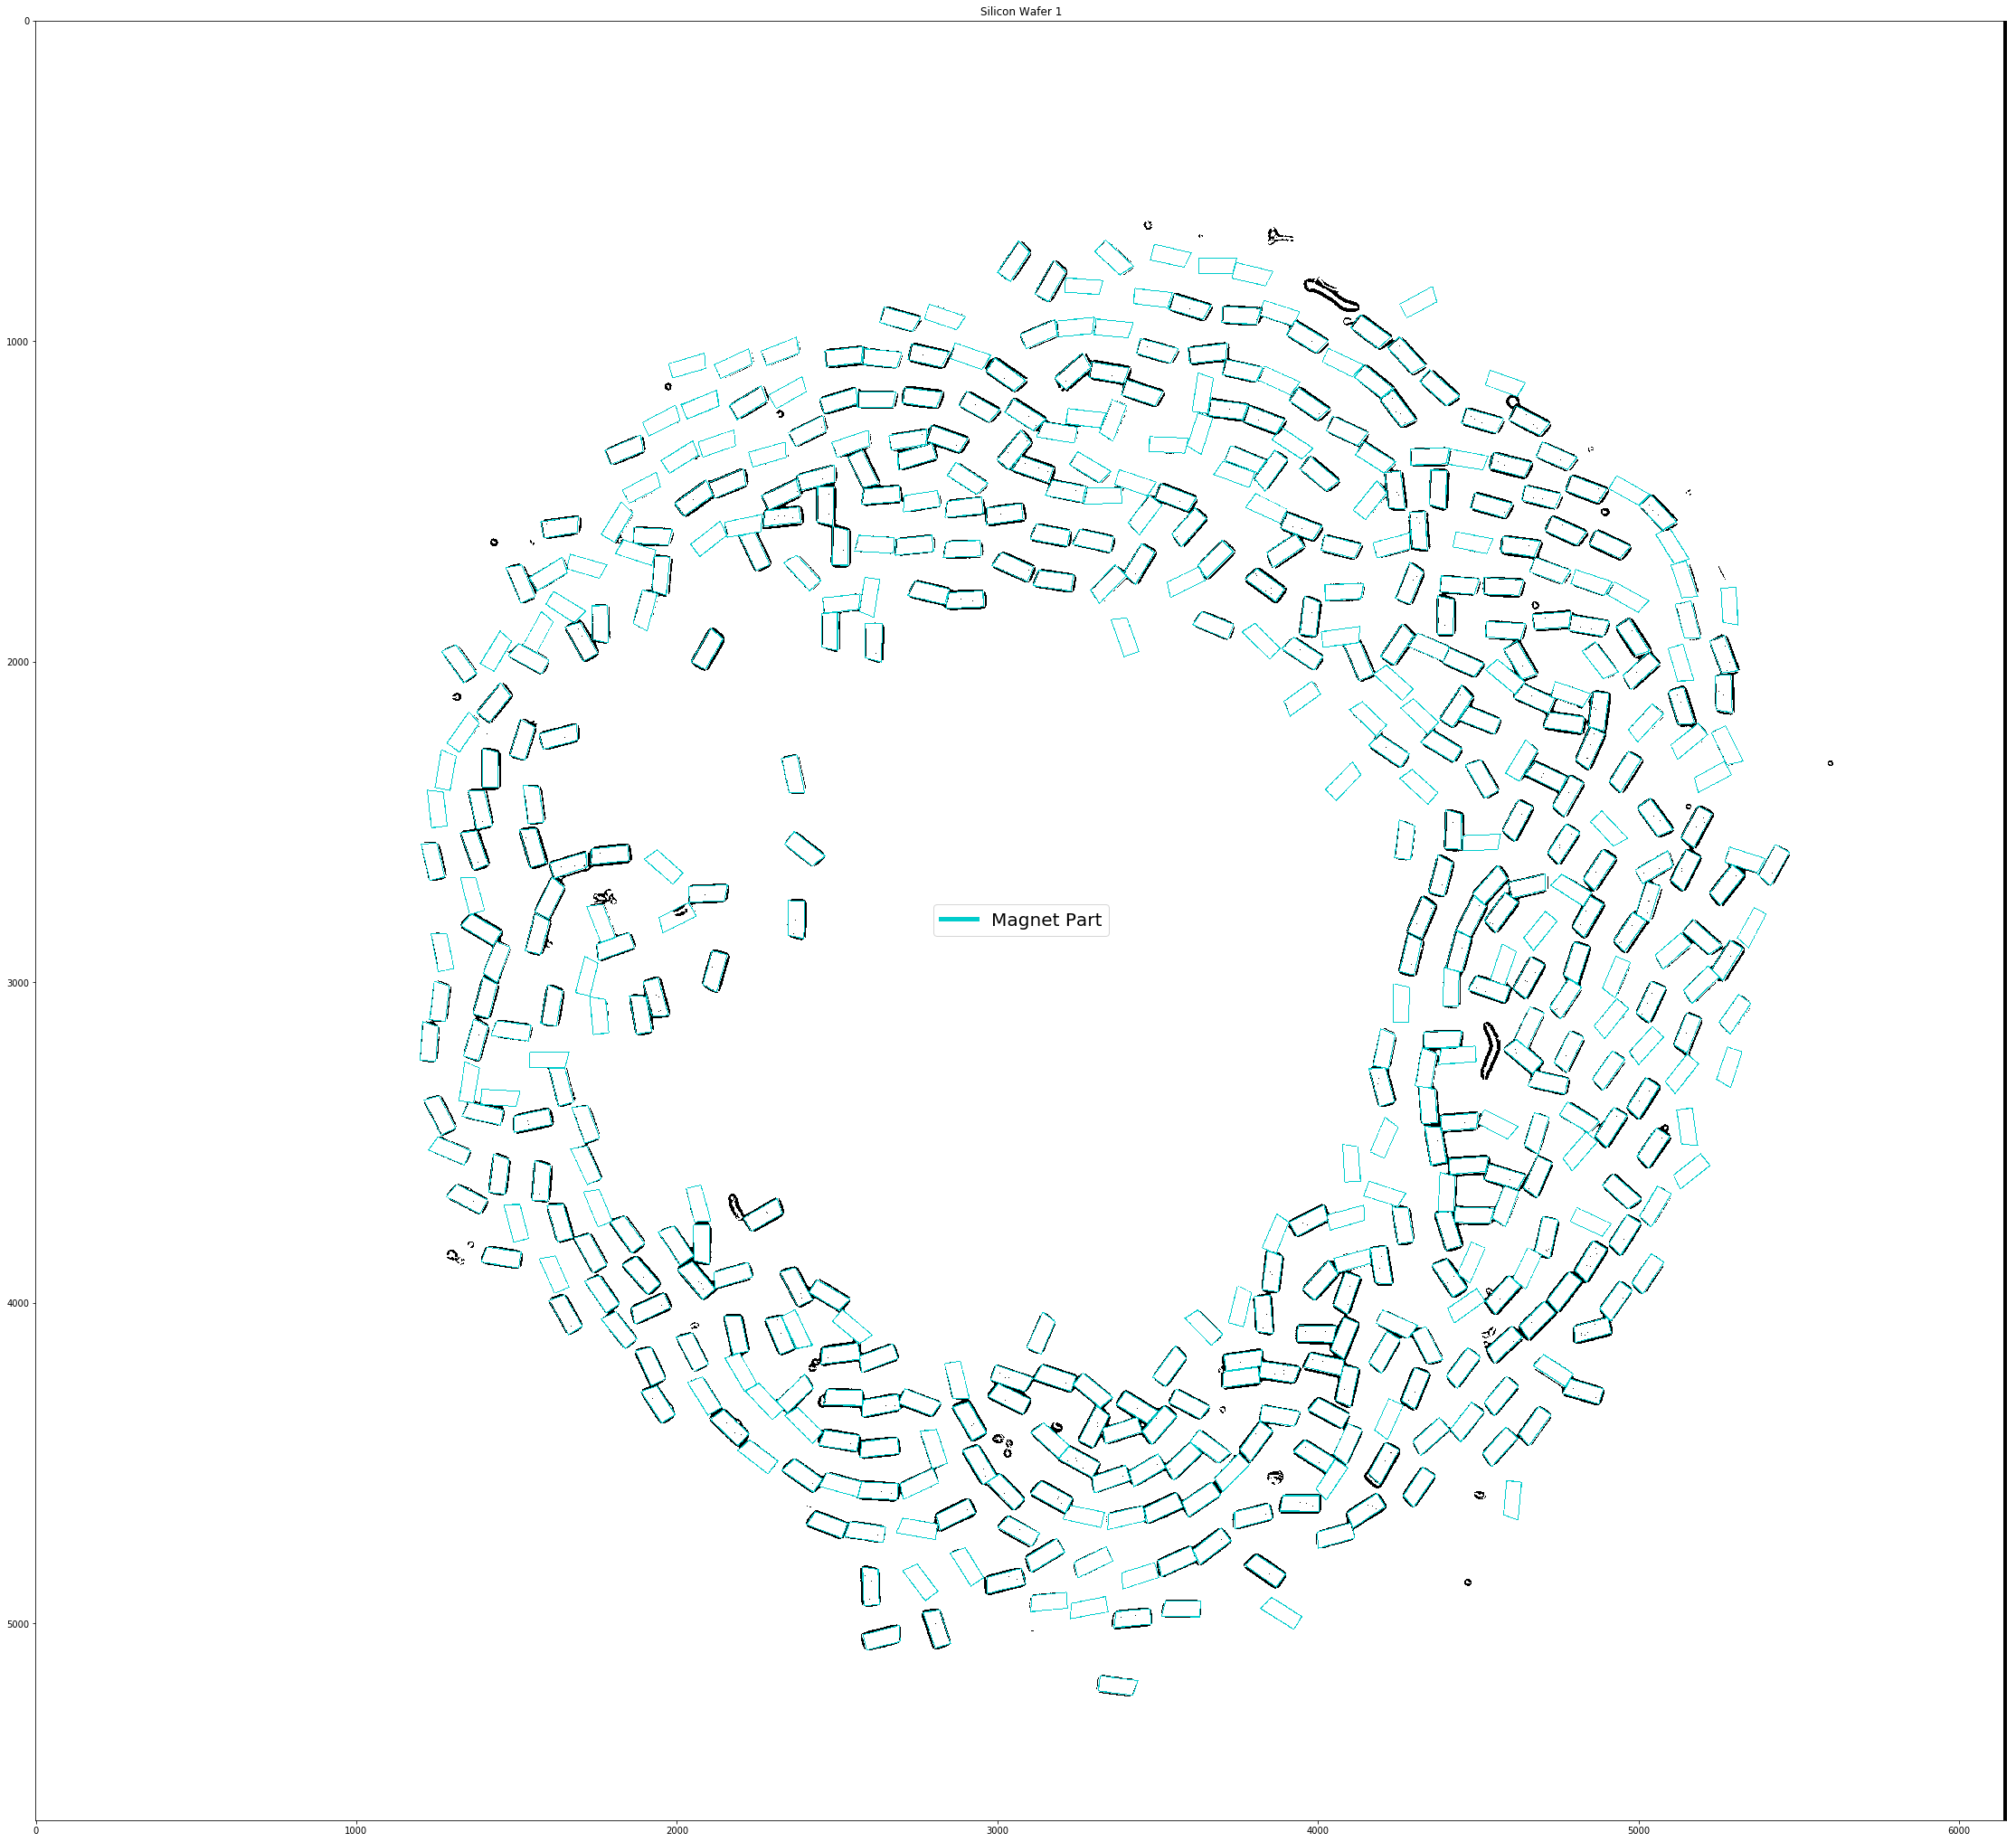

In [206]:
plt.figure(figsize=(40, 36.61))
#plt.gray()
plt.imshow(wafer_1_magfluo)

plt.title('Silicon Wafer 1')

legend_elements = [Line2D([0], [0], color=magnet_color, lw=thickness, label='Magnet Part')]
plt.legend(handles=legend_elements, loc='center', fontsize=20)

plt.show()

### Histogram Equalization

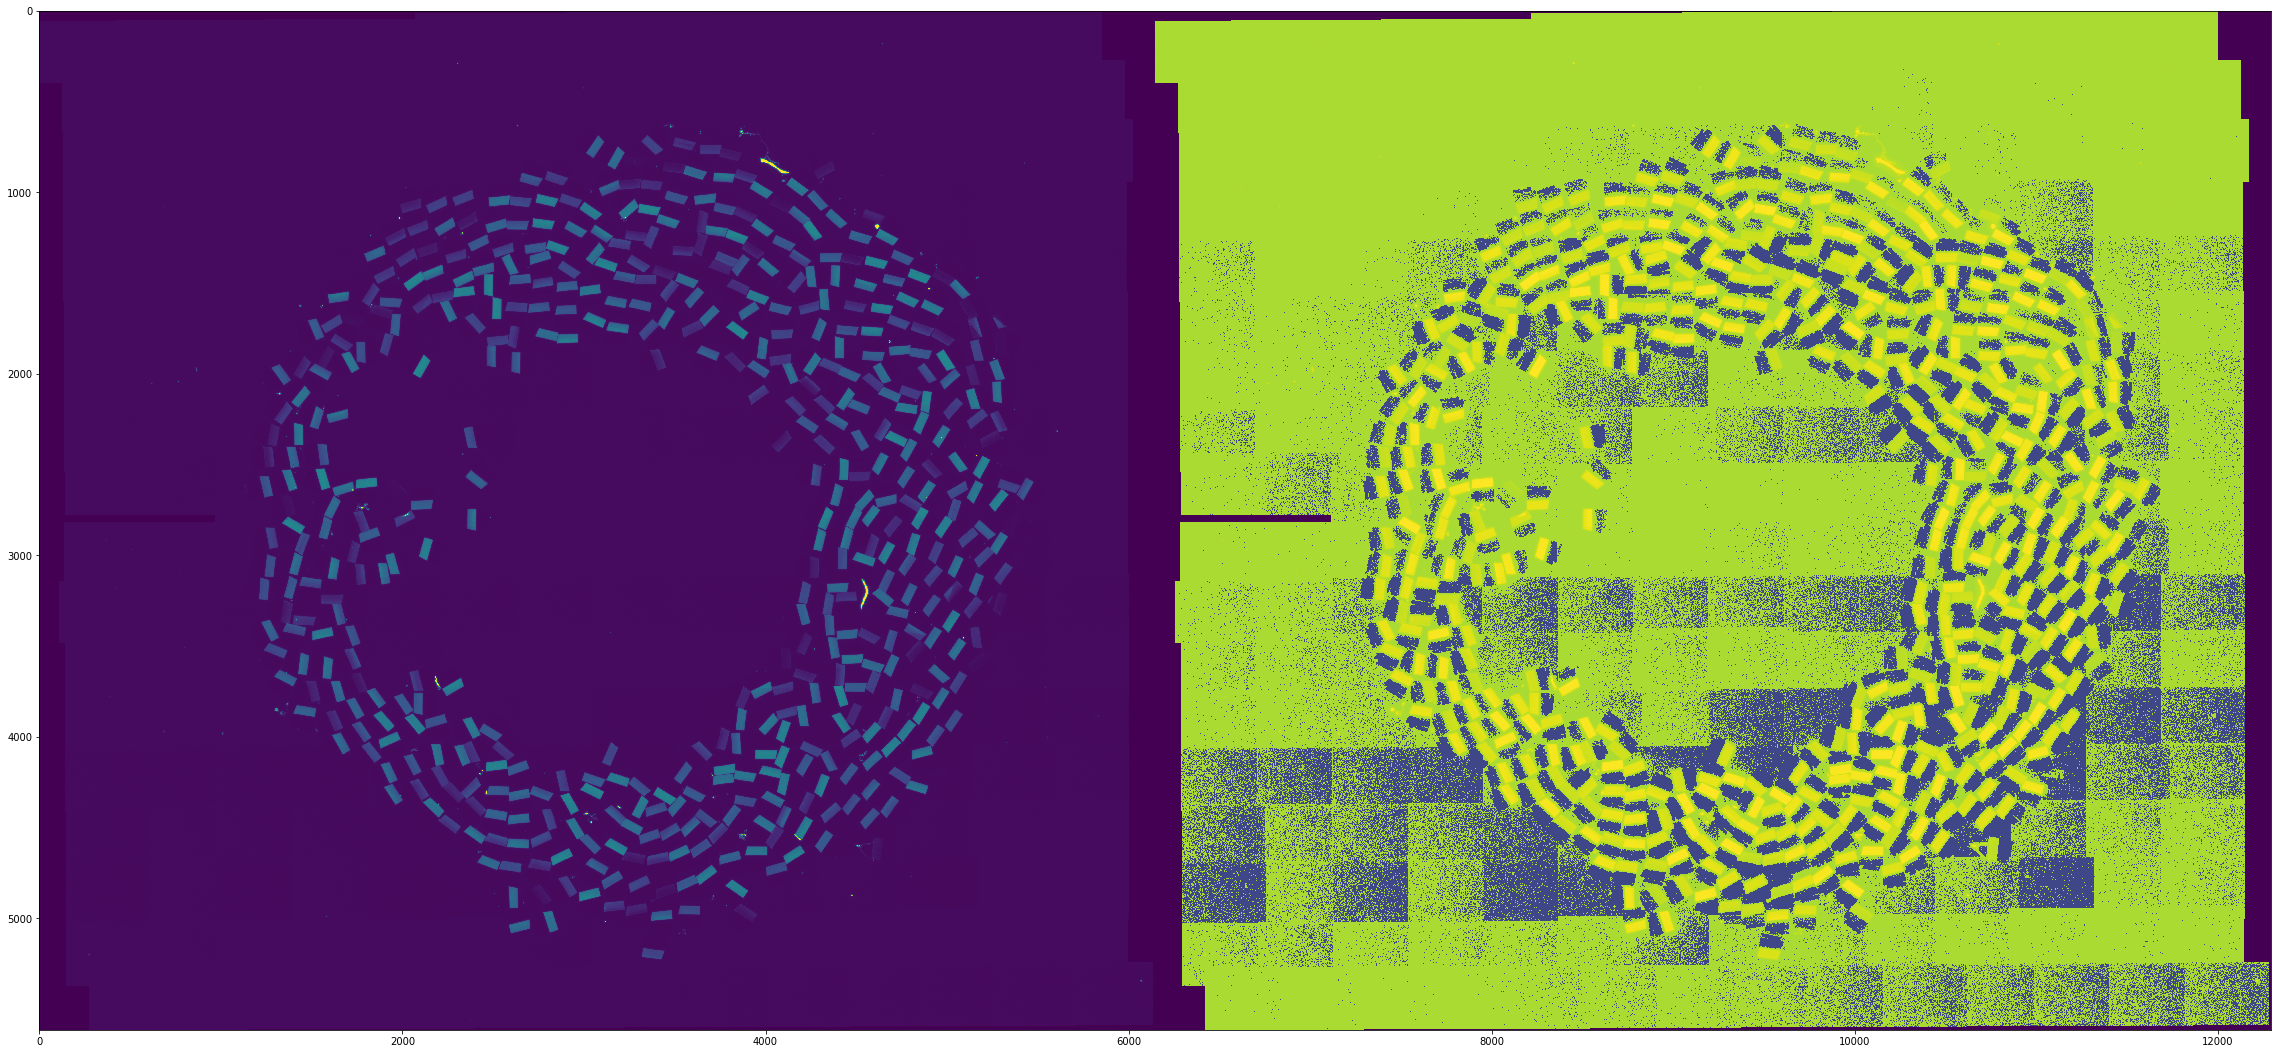

In [36]:
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")
    
equ = cv.equalizeHist(wafer_1_magfluo)
res = np.hstack((wafer_1_magfluo, equ)) #stacking images side-by-side

plt.figure(figsize=(40, 36.61))
plt.imshow(res)
#cv.imwrite('res.png',res)

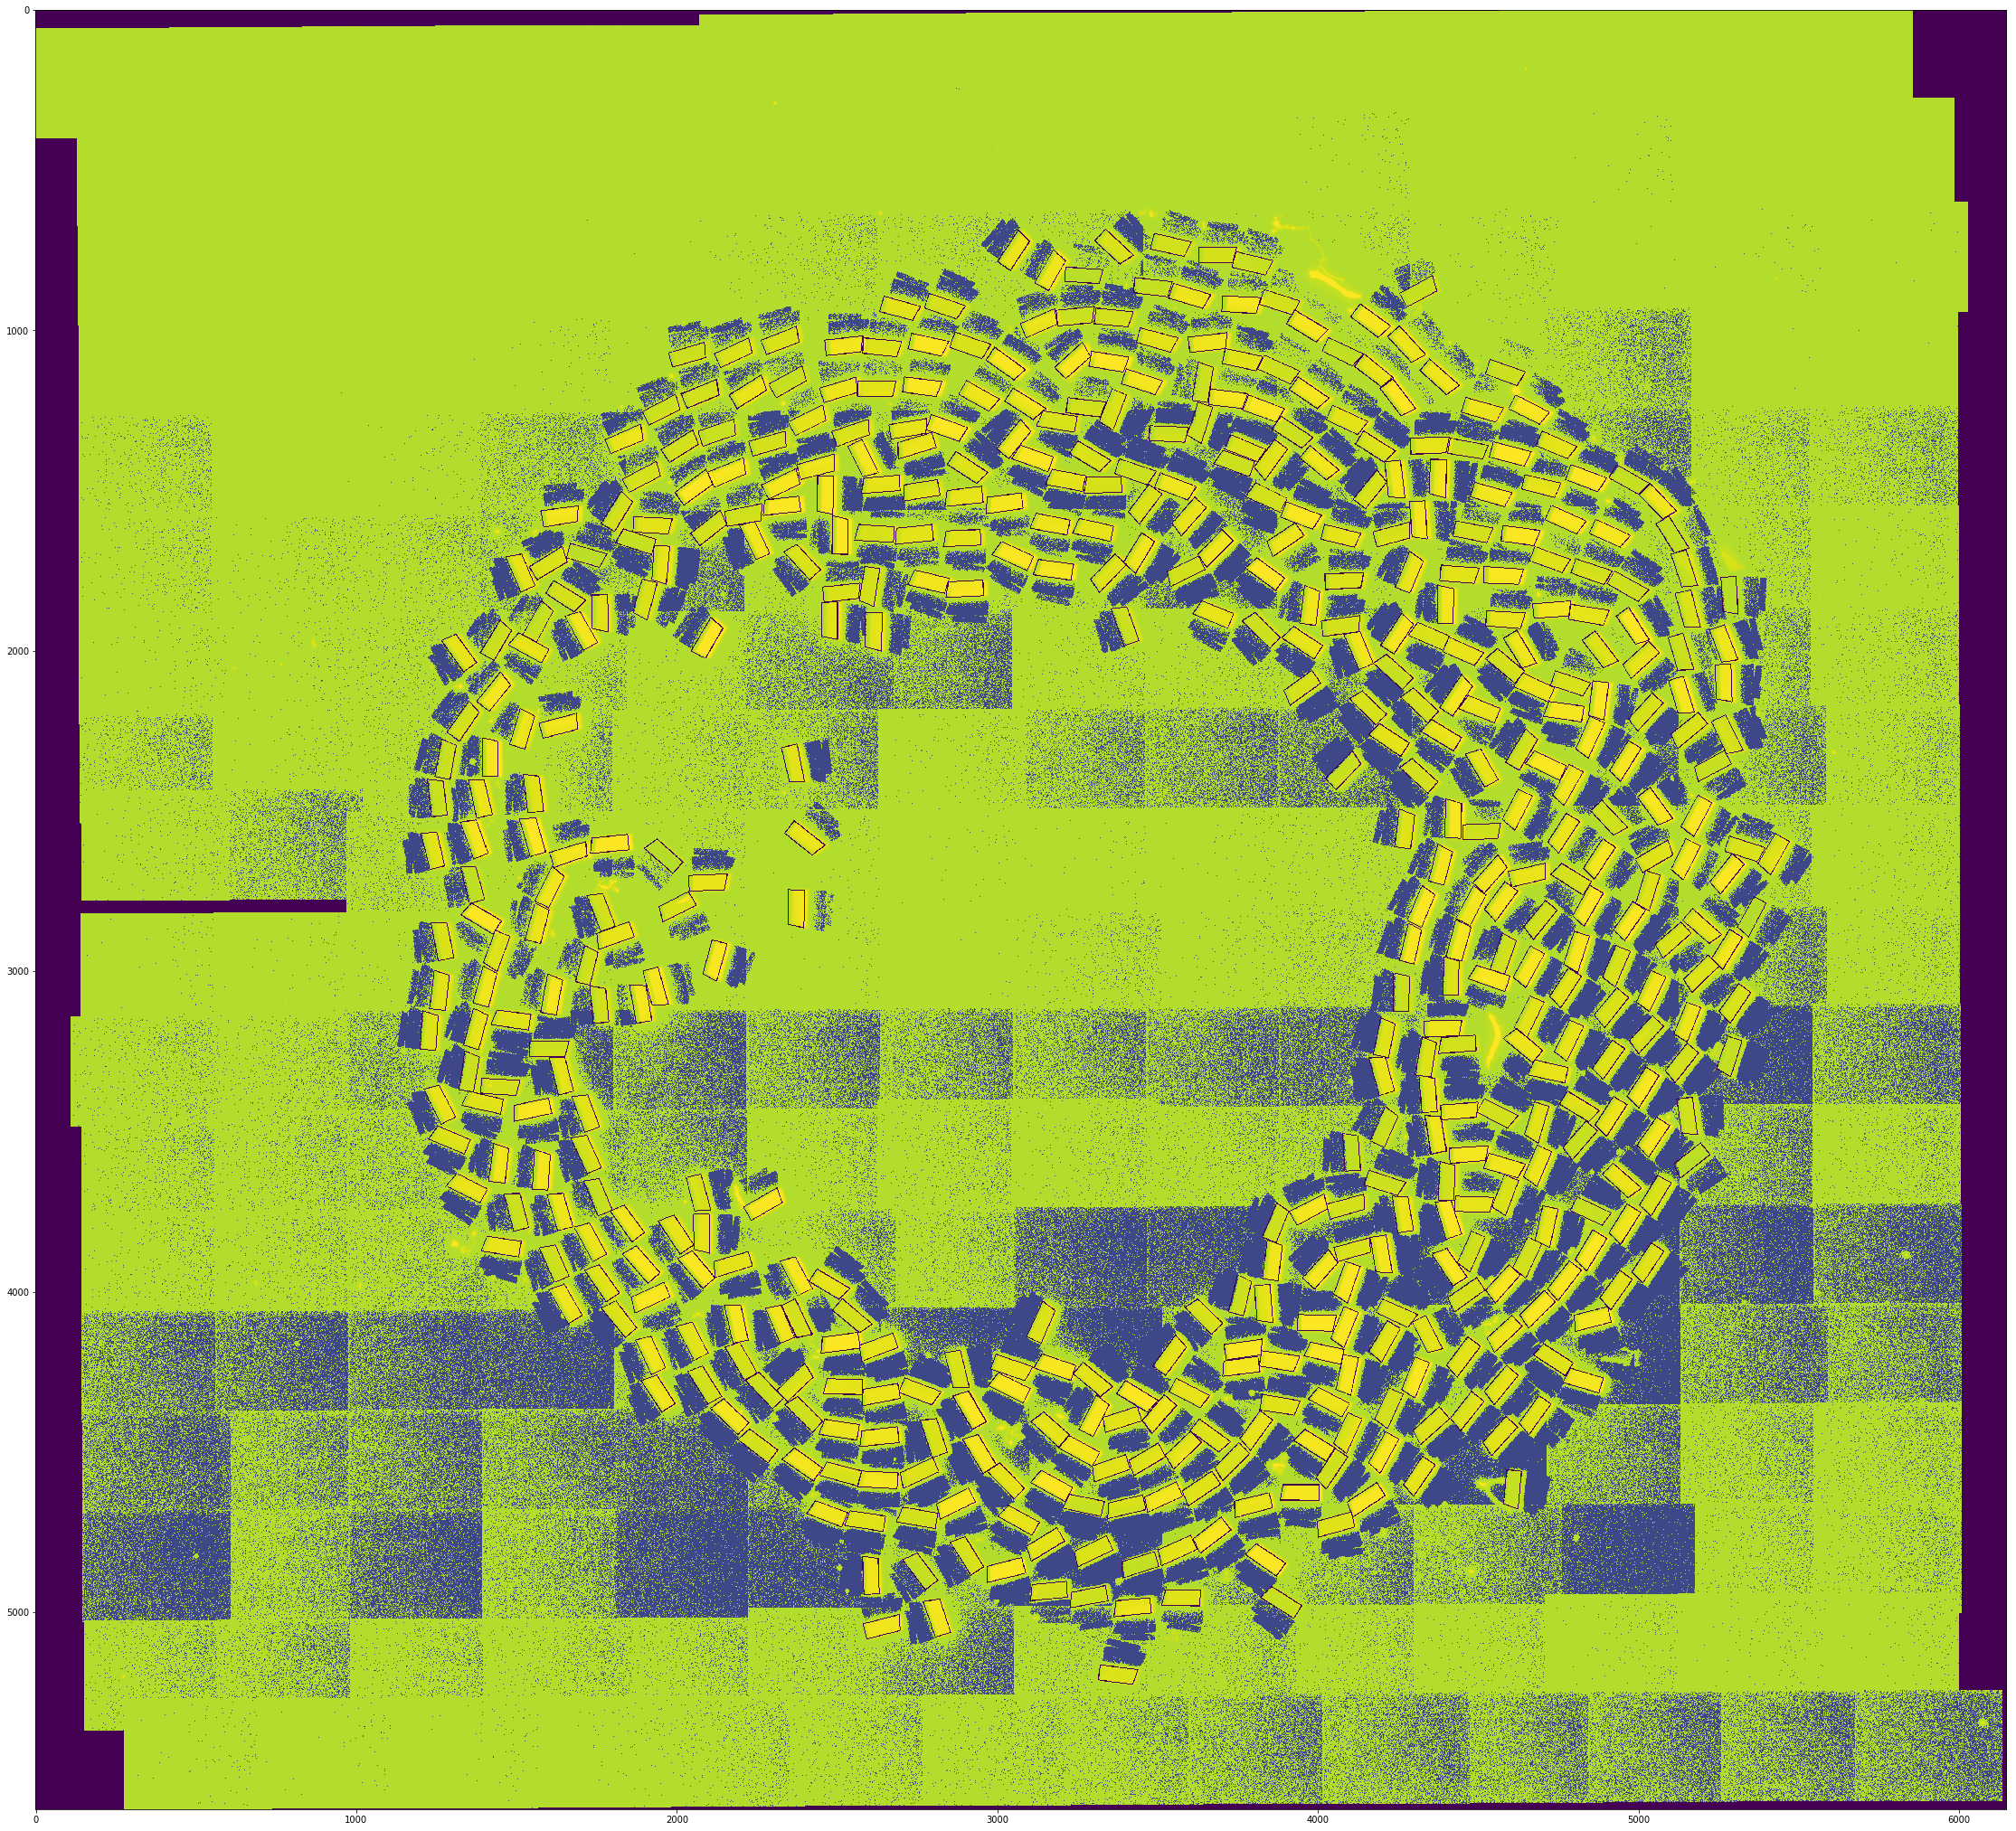

In [37]:
path_img_magfluo= f"{dir_silicon_wafer}/wafer_{str(DATASET_NUMBER)}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_1_magfluo = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")
    
wafer_1_magfluo = draw_labels(wafer_1_magfluo, wafer_mag_lbl, thickness=2, color=magnet_color, fill_poly=False)
wafer_1_magfluo = cv.equalizeHist(wafer_1_magfluo)

plt.figure(figsize=(40, 36.61))
plt.imshow(wafer_1_magfluo)
#cv.imwrite('res.png',res)

### Compute Section Detection Boxes + Save Cropped Image

- Instead of getting the segmentation boxes for the brain part, then the mag part, this will create a box around the full section (including brain and mag part). 
- Compute and save txt file the coordinates of each Detection box (cropped)
- It will then save a new cropped image based on this detection box, to get only one section in the image.
- Create 2 new text files describing the segmentation boxes for each cropped image.


In [ ]:
f_seg_tissues= open("boxes_tissues_"+str(DATASET_NUMBER)+".txt","w+")
f_seg_mag= open("boxes_mag_"+str(DATASET_NUMBER)+".txt","w+")
f_boxes= open("new_boxes_"+str(DATASET_NUMBER)+".txt","w+")

# Iterate through all section of the specified dataset image
for i in range(wafer_mag_lbl.shape[0]):
    
    # Can modify the margin (Ex for dataset 3 better to put margin = 100)
    margin = 50
    
    # Load segmentation mag
    temp_mag = wafer_mag_lbl.iloc[i]
    # Extract the x-y min/max border of the mag part.
    max_x_mag = max(temp_mag['point_1']['x'], temp_mag['point_2']['x'], temp_mag['point_3']['x'], temp_mag['point_4']['x'])
    min_x_mag = min(temp_mag['point_1']['x'], temp_mag['point_2']['x'], temp_mag['point_3']['x'], temp_mag['point_4']['x'])
    max_y_mag = max(temp_mag['point_1']['y'], temp_mag['point_2']['y'], temp_mag['point_3']['y'], temp_mag['point_4']['y'])
    min_y_mag = min(temp_mag['point_1']['y'], temp_mag['point_2']['y'], temp_mag['point_3']['y'], temp_mag['point_4']['y'])
    
    # Load segmentation tissue
    temp_tissue = wafer_tissue_lbl.iloc[i]
    # Extract the x-y min/max border of the tissue part and compare it to the mag x-y min/max part.
    # It will then get the limit coordinates of the full section (tissue + mag)
    # We add a margin at the coordinates to not crop exactly the section, and get some "noise/closed section part"
    max_x = max(max_x_mag,temp_tissue['point_1']['x'], temp_tissue['point_2']['x'], temp_tissue['point_3']['x'], temp_tissue['point_4']['x']) + margin//3 
    min_x = min(min_x_mag,temp_tissue['point_1']['x'], temp_tissue['point_2']['x'], temp_tissue['point_3']['x'], temp_tissue['point_4']['x']) - margin//3 
    max_y = max(max_y_mag,temp_tissue['point_1']['y'], temp_tissue['point_2']['y'], temp_tissue['point_3']['y'], temp_tissue['point_4']['y']) + margin//3 
    min_y = min(min_y_mag,temp_tissue['point_1']['y'], temp_tissue['point_2']['y'], temp_tissue['point_3']['y'], temp_tissue['point_4']['y']) - margin//3
    
    # Compute the coordinates of the tissue segmentation boxes in the Croppped image (Size of image changed, starting coordinates too)
    crop_tissues_p1_x = temp_tissue['point_1']['x'] - min_x  
    crop_tissues_p1_y = temp_tissue['point_1']['y'] - min_y  
    
    crop_tissues_p2_x = temp_tissue['point_2']['x'] - min_x  
    crop_tissues_p2_y = temp_tissue['point_2']['y'] - min_y  
    
    crop_tissues_p3_x = temp_tissue['point_3']['x'] - min_x  
    crop_tissues_p3_y = temp_tissue['point_3']['y'] - min_y 
    
    crop_tissues_p4_x = temp_tissue['point_4']['x'] - min_x 
    crop_tissues_p4_y = temp_tissue['point_4']['y'] - min_y 
    
    # Compute the coordinates of the mag segmentation boxes in the Croppped image (Size of image changed, starting coordinates too)
    crop_mag_p1_x = temp_mag['point_1']['x'] - min_x  
    crop_mag_p1_y = temp_mag['point_1']['y'] - min_y  
    
    crop_mag_p2_x = temp_mag['point_2']['x'] - min_x  
    crop_mag_p2_y = temp_mag['point_2']['y'] - min_y  
    
    crop_mag_p3_x = temp_mag['point_3']['x'] - min_x  
    crop_mag_p3_y = temp_mag['point_3']['y'] - min_y 
    
    crop_mag_p4_x = temp_mag['point_4']['x'] - min_x 
    crop_mag_p4_y = temp_mag['point_4']['y'] - min_y 
    
    #Store in files
    f_seg_tissues.write("%d,%d\t%d,%d\t%d,%d\t%d,%d\r\n" % (crop_tissues_p1_x,crop_tissues_p1_y,  crop_tissues_p2_x,crop_tissues_p2_y,  crop_tissues_p3_x,crop_tissues_p3_y,  crop_tissues_p4_x,crop_tissues_p4_y))
    f_seg_mag.write("%d,%d\t%d,%d\t%d,%d\t%d,%d\r\n" % (crop_mag_p1_x,crop_mag_p1_y,  crop_mag_p2_x,crop_mag_p2_y,  crop_mag_p3_x,crop_mag_p3_y,  crop_mag_p4_x,crop_mag_p4_y))
    f_boxes.write("%d,%d\t%d,%d\t%d,%d\t%d,%d\r\n" % (min_x, min_y,  max_x,min_y,  max_x,max_y,  min_x,max_y))
    
    # Save new cropped image in file .tiff
    crop_img = wafer_1[min_y:max_y, min_x:max_x]
    cv.imwrite("data"+str(DATASET_NUMBER)+"_cropped/"+str(i)+".tiff", crop_img)
    
f_seg_tissues.close()
f_seg_mag.close()
f_boxes.close()

### Plot the Detection Cropped Boxes

In [ ]:
box_ = pd.read_csv(f"new_boxes_"+str(DATASET_NUMBER)+".txt", sep="\t|,", header=None, names=index, engine='python')
#Without scale
box_.head()

In [ ]:
path_img= f"{dir_silicon_wafer}/wafer_"+str(DATASET_NUMBER)+"_downsized_3.tif"
if os.path.isfile(path_img):
    wafer_1 = cv.imread(path_img)
else:
    print ("The file " + path_img + " does not exist.")

In [ ]:
wafer_1 = draw_labels(wafer_1, box_, thickness, magnet_color, fill_poly)

In [ ]:
plt.figure(figsize=(40, 36.61))
plt.imshow(wafer_1)

plt.title('Silicon Wafer 1')

plt.legend(handles=legend_elements, loc='center', fontsize=20)

plt.show()

### Plot the Segmentation boxes in cropped images

In [ ]:
boxes_tissues = pd.read_csv(f"boxes_tissues_"+str(DATASET_NUMBER)+".txt", sep="\t|,", header=None, names=index, engine='python')
#Without scale
boxes_tissues.head()

In [ ]:
boxes_mag = pd.read_csv(f"boxes_mag_"+str(DATASET_NUMBER)+".txt", sep="\t|,", header=None, names=index, engine='python')
#Without scale
boxes_mag.head()

In [ ]:
# Draw only one box
def draw_labels_custom(image, labels_df, thickness, color, fill_poly):
    pts = np.array(labels_df).reshape((-1,1,2))
    if fill_poly:
        image = cv.fillPoly(image, np.int32([pts]), color=rgb(color))
    else:
        image = cv.polylines(image, np.int32([pts]), True, color=rgb(color), thickness=thickness)

    return image

##### Load cropped image

In [ ]:
index_cropped_image = 0

path_cropped = "data"+str(DATASET_NUMBER)+"_cropped/"+str(index_cropped_image)+".tiff"
if os.path.isfile(path_cropped):
    cropped = cv.imread(path_cropped)
else:
    print ("The file " + path_cropped + " does not exist.")

plt.imshow(cropped)

##### Cleaned/Extracted cropped image

This part is using an extracted image. Based on the produced cropped image, we extract only the interesting section (using GUI with polygon, infographic tools like Gimp, Photoshop etc..) __Manual Part__


And we plot the segmentation boxes which are the same as the initial cropped image, as the size didn't changed.

In [ ]:
path_cropped = "data"+str(DATASET_NUMBER)+"_cropped/extract/"+str(index_cropped_image)+".tiff"
if os.path.isfile(path_img):
    extract_cropped = cv.imread(path_cropped)
else:
    print ("The file " + path_cropped + " does not exist.")

plt.imshow(extract_cropped)

In [ ]:
seg_tissue = boxes_tissues[index_cropped_image:index_cropped_image+1]
seg_mag = boxes_mag[index_cropped_image:index_cropped_image+1]

extract_cropped = draw_labels_custom(extract_cropped, seg_tissue, 2, tissue_color, fill_poly)
extract_cropped = draw_labels_custom(extract_cropped, seg_mag, 2, magnet_color, fill_poly)

plt.imshow(extract_cropped)

### Check that all segmentation boxes are well associated with all the cropped images 
(from a chosen dataset)

In [ ]:
for i in range(boxes_mag.shape[0]):
    path_cropped = "data"+str(DATASET_NUMBER)+"_cropped/"+str(i)+".tiff"
    if os.path.isfile(path_img):
        cropped = cv.imread(path_cropped)
    else:
        print ("The file " + path_cropped + " does not exist.")
    
    seg_tissue = boxes_tissues[i:i+1]
    seg_mag = boxes_mag[i:i+1]
    
    cropped = draw_labels_custom(cropped, seg_tissue, 2, tissue_color, fill_poly)
    cropped = draw_labels_custom(cropped, seg_mag, 2, magnet_color, fill_poly)

    plt.imshow(cropped)
    plt.title("Silicon Wafer 1 : Subimage"+str(i))
    legend_elements = [Line2D([0], [0], color=magnet_color, lw=thickness, label='Magnet Part'),
                       Line2D([0], [0], color=tissue_color, lw=thickness, label='Brain Part')]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=7)

    plt.show()   
    cv.waitKey(1)
